# Project 1 — Wine Quality (Red + White)
## Supervised Learning

**Task:** Multiclass classification — quality (discrete rating/class)  
**Metrics:** Macro-F1 and Accuracy (minimum). Include confusion matrix and per-class performance discussion.  
**Workflow:** EDA → Hypotheses → Train/tune (DT, kNN, SVM, NN-sklearn, NN-PyTorch) → Interpretation → Conclusion

---
## 1. Setup and data loading

In [1]:
import sys
from config import RANDOM_SEED, DATA_PATH, TARGET_COLUMN
from utils import set_seed
from data_loading import load_wine, get_target_and_features

set_seed()
# Load and inspect
df = load_wine()
X, y = get_target_and_features(df)
print(df.shape)


Removed 1177 duplicate row(s). Dataset: 6497 -> 5320 rows.
(5320, 14)


---
## 2. Exploratory Data Analysis (EDA)

Class distribution, basic stats, plots. Ground for hypotheses.


First 5 rows:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  class  type  quality  
0      9.4      5     0        5  


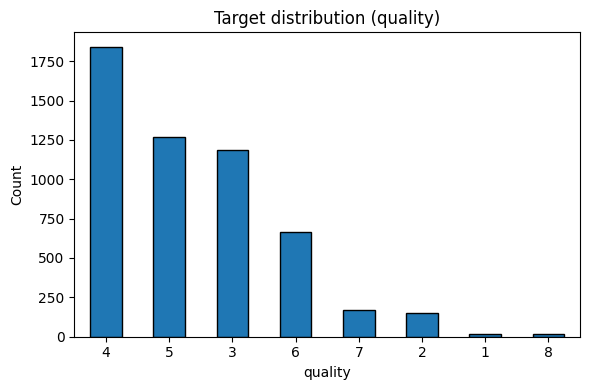

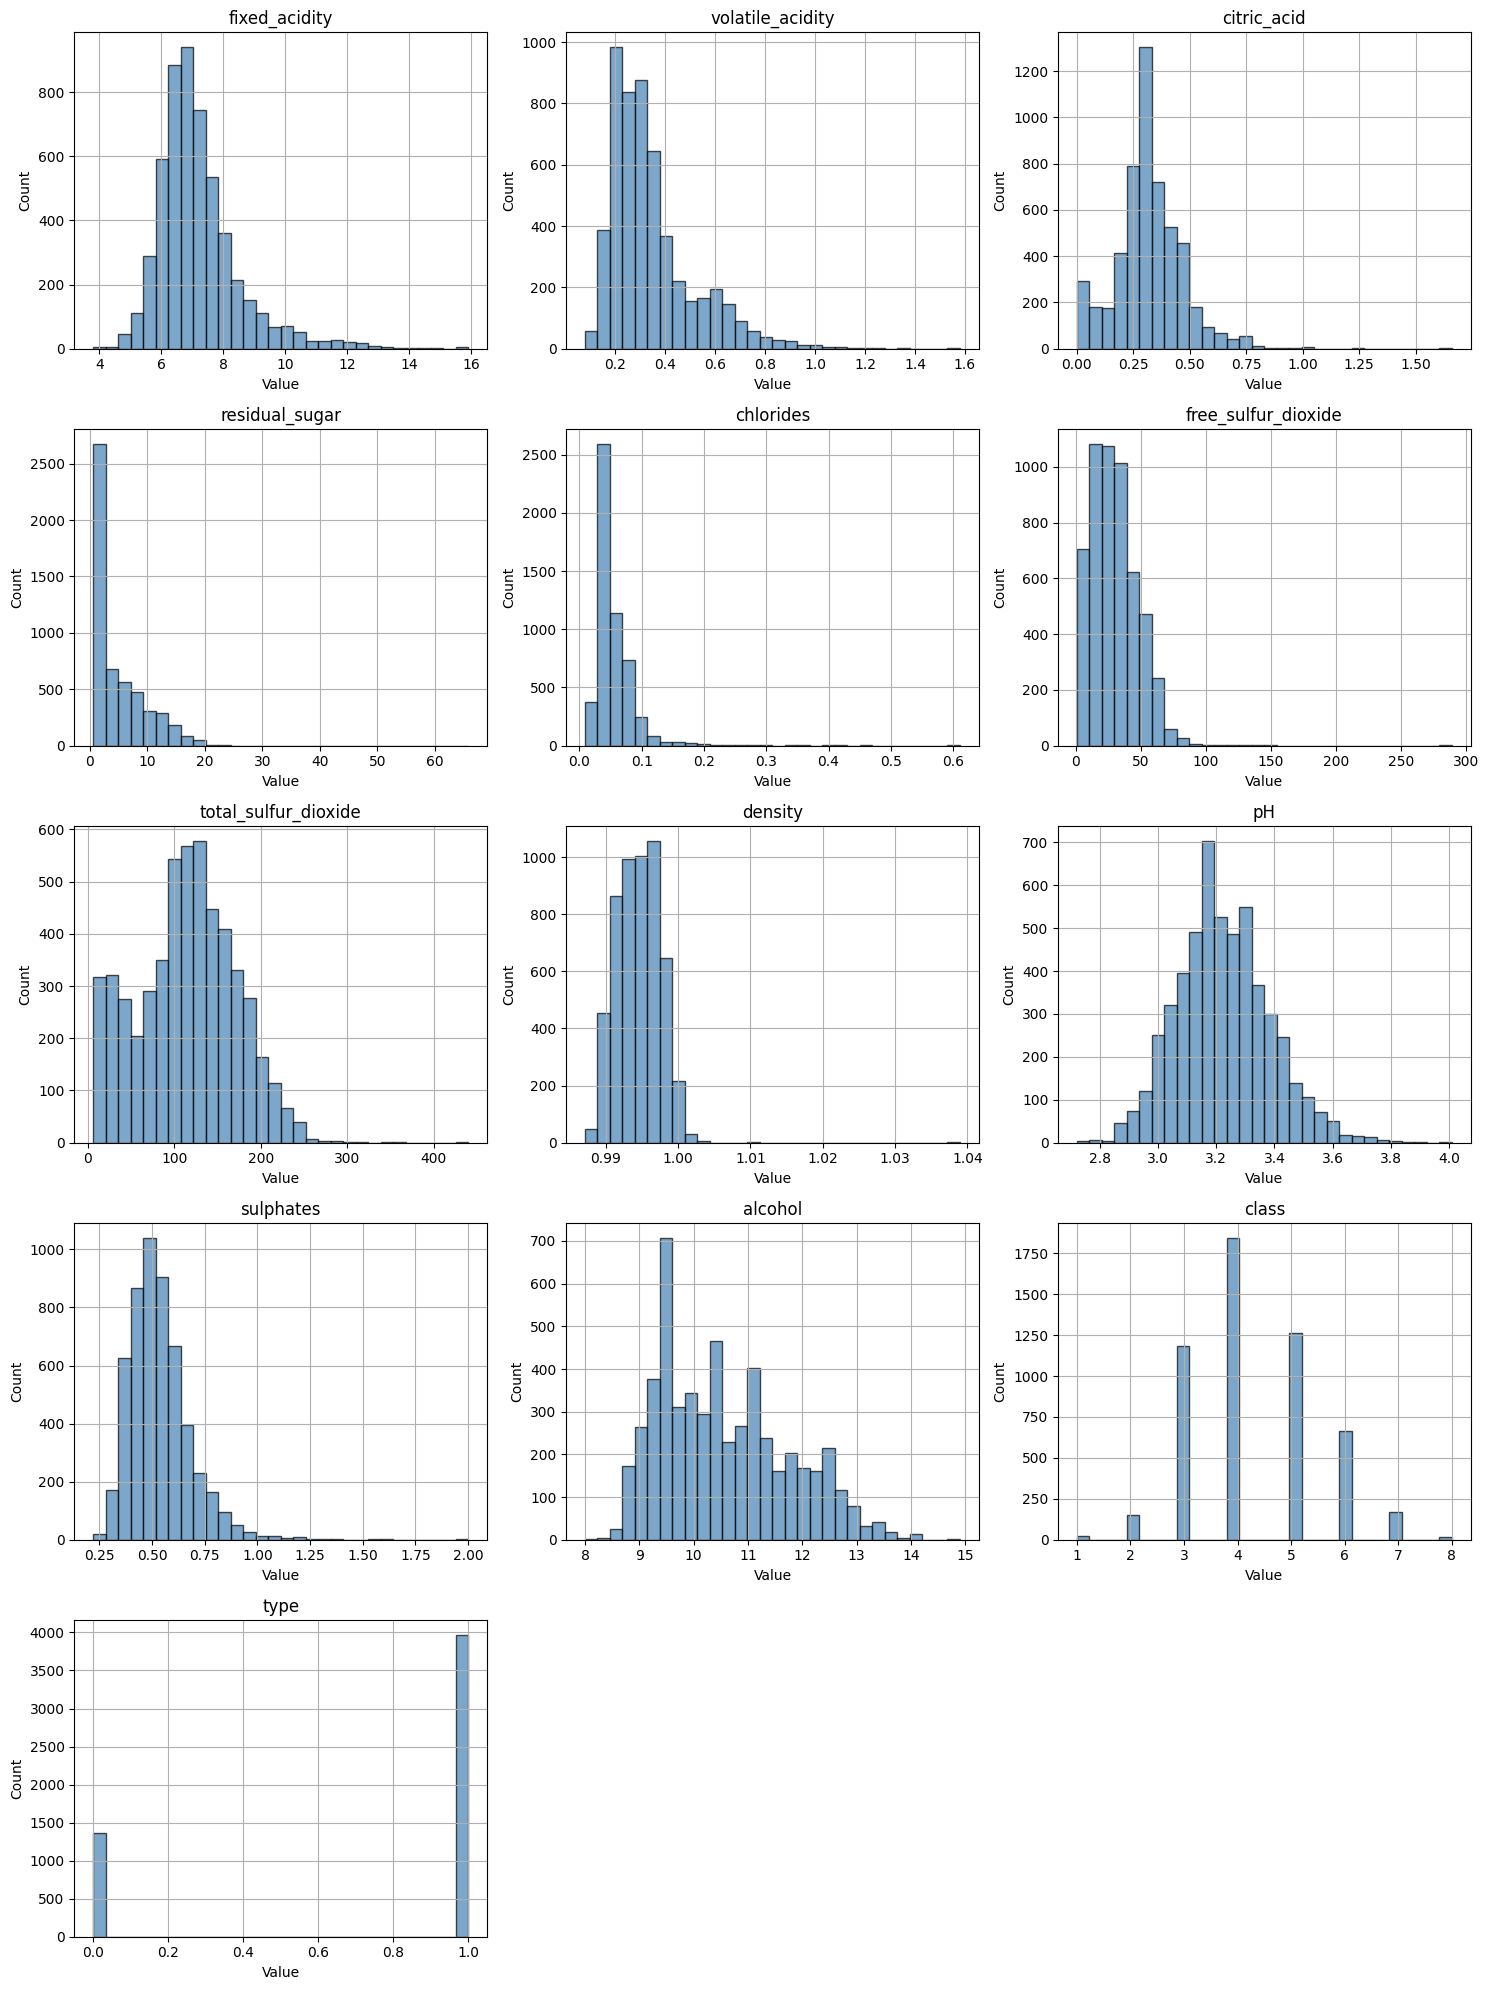


Quality distribution by type (percentages):
------------------------------------------------------------
quality         1         2          3          4          5          6          7        8
type                                                                                       
0        0.000000  0.000000   0.735835   3.899926  42.457689  39.367182  12.288447  1.25092
1        0.504923  3.862661  29.664226  45.140116  17.394597   3.307246   0.126231  0.00000


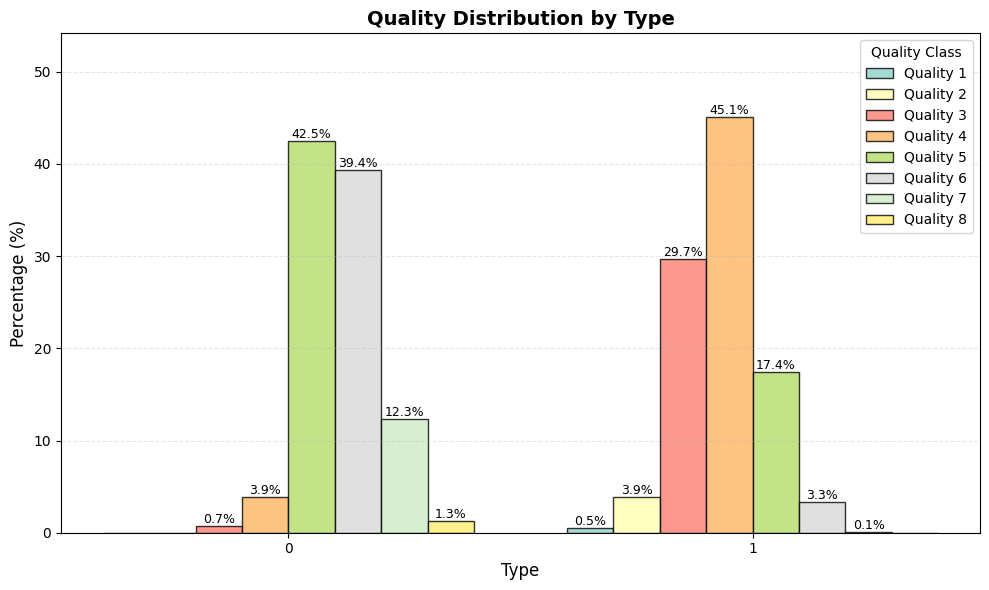


Correlation of numeric features with target:
------------------------------------------------------------
  citric_acid         : -0.0636
  density             :  0.0749
  chlorides           :  0.2213
  pH                  :  0.2627
  volatile_acidity    :  0.2828
  residual_sugar      : -0.2889
  fixed_acidity       :  0.3034
  free_sulfur_dioxide : -0.3075
  alcohol             :  0.3111
  sulphates           :  0.3986
  total_sulfur_dioxide: -0.5575
  type                : -0.6617
  class               :  1.0000


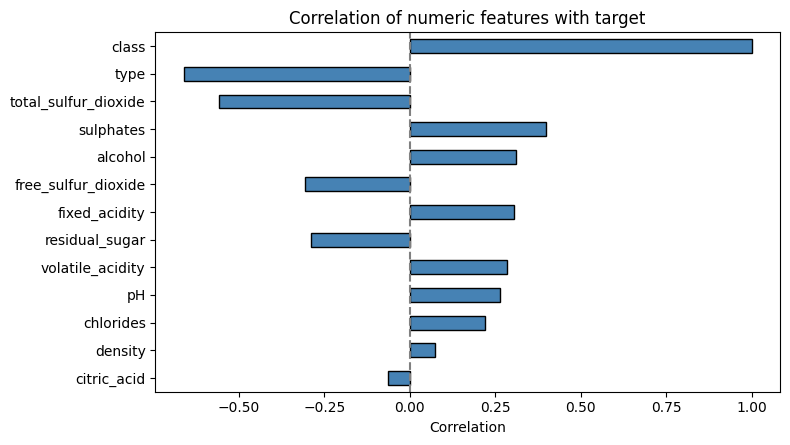


Correlation matrix (numeric features):
------------------------------------------------------------
                      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol     class      type
fixed_acidity              1.000000          0.214752     0.330328       -0.104439   0.288918            -0.281590             -0.327471  0.478180 -0.271182   0.304844 -0.102573  0.303440 -0.486253
volatile_acidity           0.214752          1.000000    -0.384192       -0.163696   0.367626            -0.349039             -0.400716  0.308452  0.246687   0.227772 -0.065411  0.282775 -0.645335
citric_acid                0.330328         -0.384192     1.000000        0.146189   0.055199             0.130849              0.194835  0.094758 -0.344735   0.059183 -0.005496 -0.063586  0.183759
residual_sugar            -0.104439         -0.163696     0.146189        1.000000  -0.123094             0

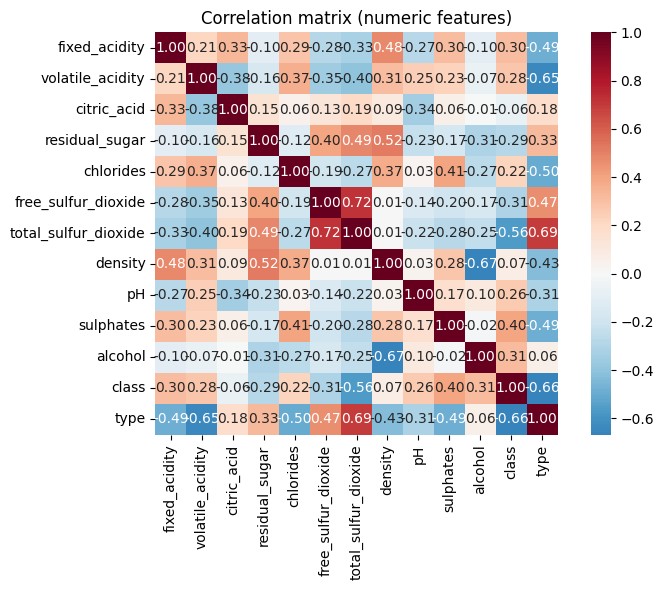


EDA complete.

EDA results saved to: /home/ubuntu/ml-supervised-project1/wine_quality/EDA_RESULTS.txt


In [2]:
from eda import run_eda

# Run full EDA
eda_results = run_eda(df, save_figures=True, save_results_to_file=True)

---
## 3. Preprocessing

TODO: Apply preprocessing based on EDA findings.

In [2]:
from preprocessing import get_dataset

# Get preprocessed train/test splits
X_train, y_train, X_test, y_test = get_dataset()

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target distribution (train):\n{y_train.value_counts()}")
print(f"Target distribution (test):\n{y_test.value_counts()}")

Removed 1177 duplicate row(s). Dataset: 6497 -> 5320 rows.
Training set: (4256, 12)
Test set: (1064, 12)
Target distribution (train):
quality
4    1473
5    1013
3     948
6     533
7     138
2     122
1      16
8      13
Name: count, dtype: int64
Target distribution (test):
quality
4    368
5    253
3    237
6    133
7     34
2     31
1      4
8      4
Name: count, dtype: int64


---
## 4. Hypotheses

TODO: Develop and state hypotheses based on EDA findings.

---
## 5. Decision Trees (DT)

TODO: Implement DT experiments.

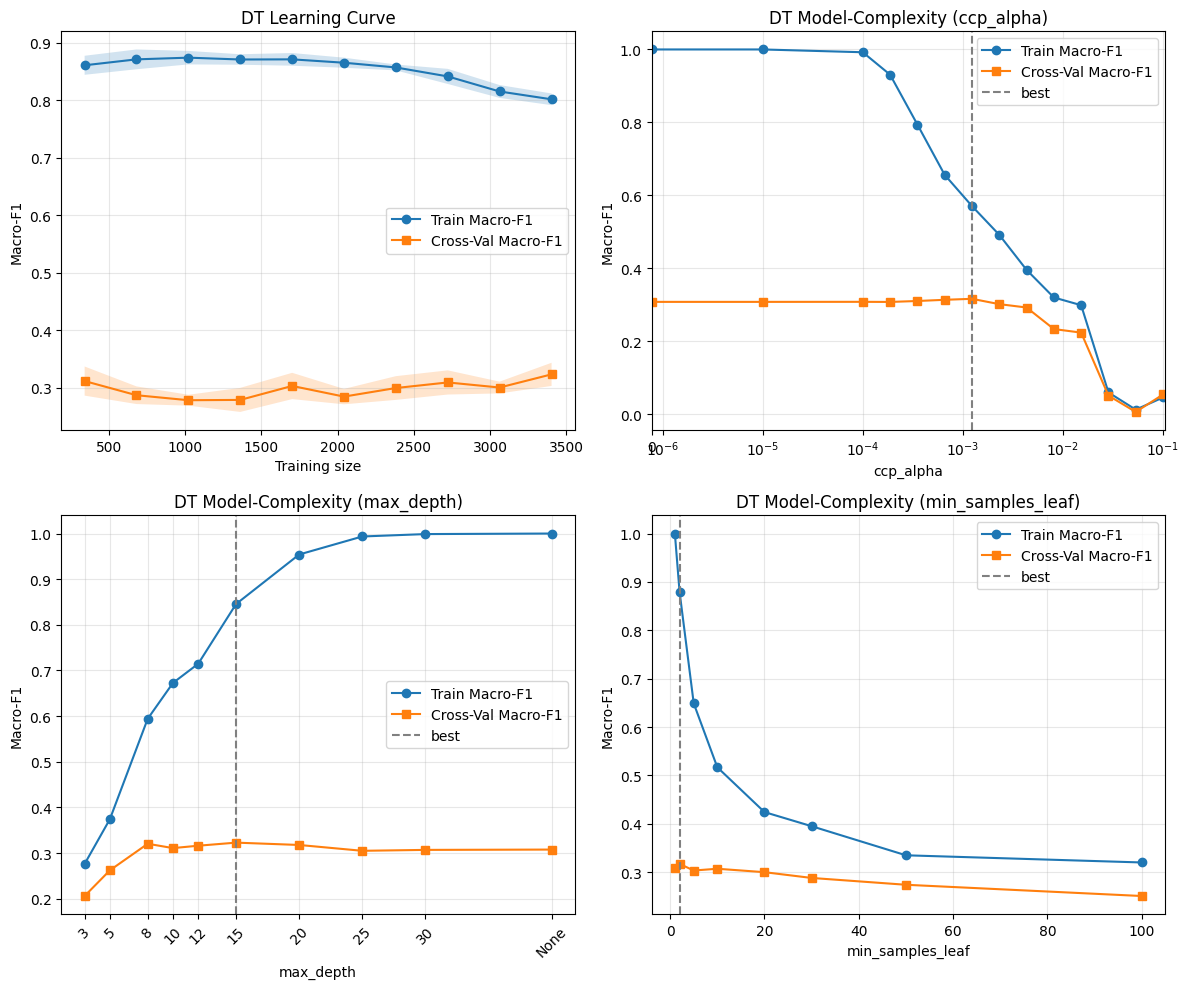

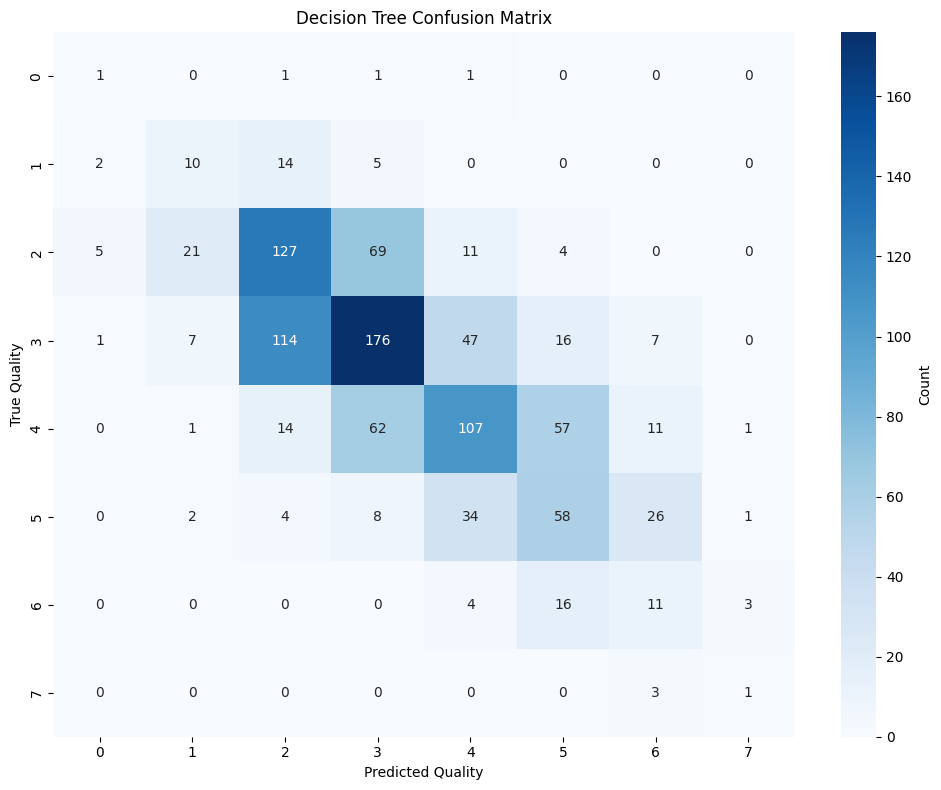

--- Best from each model-complexity curve (other params at standard) ---
  ccp_alpha curve (max_depth=None, min_samples_leaf=1): best ccp_alpha=0.001233, CV Macro-F1=0.3162
  max_depth curve (ccp_alpha=0, min_samples_leaf=1):     best max_depth=15, CV Macro-F1=0.3230
  min_samples_leaf curve (ccp_alpha=0, max_depth=None):  best min_samples_leaf=2, CV Macro-F1=0.3172
--- Grid-search best (joint tuning) ---
  CV Macro-F1=0.3253, params={'ccp_alpha': 0.0003511191734215131, 'max_depth': 20, 'min_samples_leaf': 2}

Best params (used for final model): {'criterion': 'gini', 'ccp_alpha': 0.0003511191734215131, 'max_depth': 20, 'min_samples_leaf': 2, 'class_weight': 'balanced'}
Test metrics: {'accuracy': 0.46146616541353386, 'f1_macro': 0.34442829071929937, 'f1_weighted': 0.46688311341398503, 'f1_micro': 0.46146616541353386, 'f1_per_class': {'class_1': 0.15384615384615385, 'class_2': 0.2777777777777778, 'class_3': 0.49706457925636005, 'class_4': 0.5108853410740203, 'class_5': 0.4682713347921225

In [4]:
from models_dt import run_dt

# Run Decision Tree analysis (includes model-complexity curves, learning curves, and test evaluation)
dt_results = run_dt(X_train, y_train, X_test, y_test, cv=5)

print("\n" + "="*60)
print("Decision Tree Analysis Complete")
print("="*60)
print(f"Best params: {dt_results['best_params']}")
print(f"Test Accuracy: {dt_results['test_metrics']['accuracy']:.4f}")
print(f"Test Macro-F1: {dt_results['test_metrics']['f1_macro']:.4f}")
print(f"Depth: {dt_results['depth']}, Leaves: {dt_results['n_leaves']}")
print(f"Results saved to: DT_results.txt")

### Decision Tree without class weight

Same pipeline as above but with `class_weight=None` (no class weighting) so you can compare weighted vs unweighted. Results and plots use suffix `_no_weights`.

In [ ]:
dt_results_no_cw = run_dt(X_train, y_train, X_test, y_test, cv=5, class_weight=None)

---
## 6. k-Nearest Neighbors (kNN)

TODO: Implement kNN experiments.

kNN Step 1: Model-complexity analysis


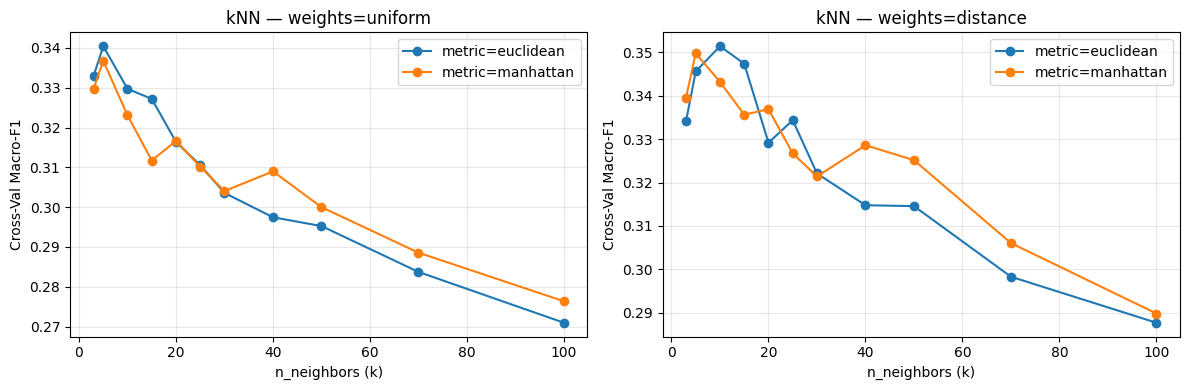

--- kNN: Model-complexity (weights × metric, CV Macro-F1 vs k) ---
k_values: [3, 5, 10, 15, 20, 25, 30, 40, 50, 70, 100]
CV Macro-F1 at k=20:
  weights=uniform, metric=euclidean: 0.3164
  weights=uniform, metric=manhattan: 0.3166
  weights=distance, metric=euclidean: 0.3292
  weights=distance, metric=manhattan: 0.3369
Best (k, weights, metric): {'k': 10, 'weights': 'distance', 'metric': 'euclidean'} | best_cv_f1_macro: 0.3514
Results saved to: /home/ubuntu/ml-supervised-project1/wine_quality/KNN_results.txt

kNN Step 2: Learning curves


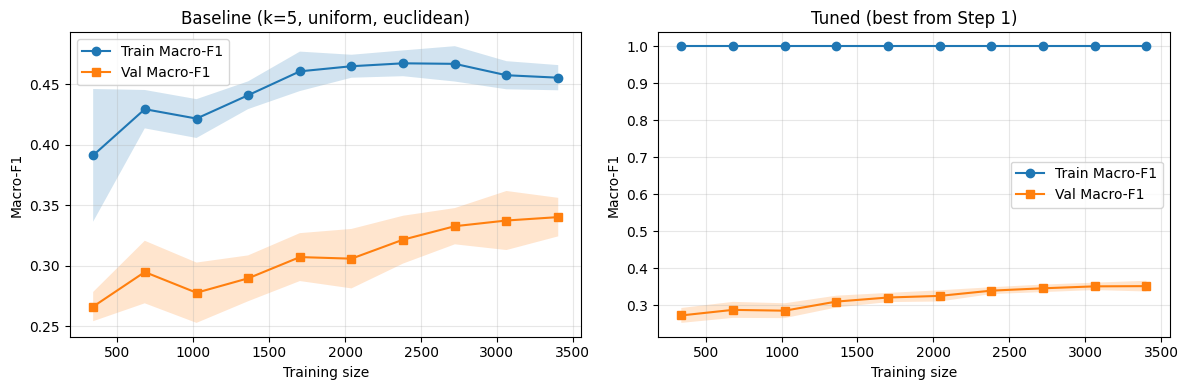

--- kNN Step 2: Learning curves ---
train_sizes: [340, 680, 1021, 1361, 1702, 2042, 2382, 2723, 3063, 3404]
Baseline (k=5): val_f1_macro_mean: [0.2664, 0.2949, 0.2778, 0.2897, 0.3072, 0.3059, 0.3216, 0.3327, 0.3374, 0.3402]
Tuned: {'k': 10, 'weights': 'distance', 'metric': 'euclidean'} val_f1_macro_mean: [0.2722, 0.2872, 0.285, 0.3096, 0.3206, 0.325, 0.3392, 0.3455, 0.3508, 0.3514]
Appended to: /home/ubuntu/ml-supervised-project1/wine_quality/KNN_results.txt

kNN Step 3: Test evaluation
--- kNN Step 3: Test evaluation ---
Best config: {'k': 10, 'weights': 'distance', 'metric': 'euclidean'}
Test metrics: {'accuracy': 0.5488721804511278, 'f1_macro': 0.3703621010350694, 'f1_weighted': 0.5423556047361913, 'f1_micro': 0.5488721804511278, 'f1_per_class': {'class_1': 0.0, 'class_2': 0.24390243902439024, 'class_3': 0.5582417582417583, 'class_4': 0.5895522388059702, 'class_5': 0.532258064516129, 'class_6': 0.5076923076923077, 'class_7': 0.53125, 'class_8': 0.0}, 'accuracy_per_class': {'class_1'

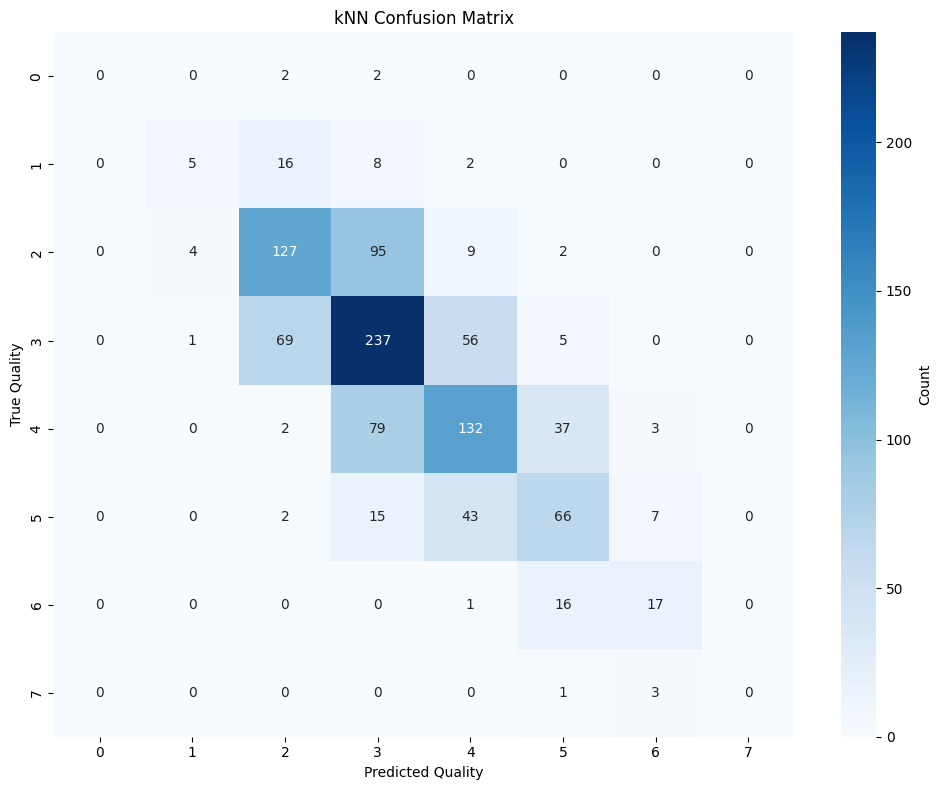


kNN Analysis Complete
Best config: {'k': 10, 'weights': 'distance', 'metric': 'euclidean'}
Test Accuracy: 0.5489
Test Macro-F1: 0.3704
Results saved to: KNN_results.txt


In [5]:
from models_knn import run_knn_step2, run_knn_learning_curves, run_knn_test_eval

# Step 1: Model complexity (k × weights × metric)
print("="*60)
print("kNN Step 1: Model-complexity analysis")
print("="*60)
knn_results = run_knn_step2(X_train, y_train, X_test, y_test, cv=5)

# Step 2: Learning curves
print("\n" + "="*60)
print("kNN Step 2: Learning curves")
print("="*60)
run_knn_learning_curves(X_train, y_train, X_test, y_test, best_config=knn_results['best_k_weights_metric'], cv=5)

# Step 3: Test evaluation
print("\n" + "="*60)
print("kNN Step 3: Test evaluation")
print("="*60)
knn_test_results = run_knn_test_eval(X_train, y_train, X_test, y_test, best_config=knn_results['best_k_weights_metric'])

print("\n" + "="*60)
print("kNN Analysis Complete")
print("="*60)
print(f"Best config: {knn_results['best_k_weights_metric']}")
print(f"Test Accuracy: {knn_test_results['test_metrics']['accuracy']:.4f}")
print(f"Test Macro-F1: {knn_test_results['test_metrics']['f1_macro']:.4f}")
print(f"Results saved to: KNN_results.txt")

---
## 7. Support Vector Machines (SVM)

TODO: Implement SVM experiments.

SVM Step 1: Model-complexity analysis


/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-

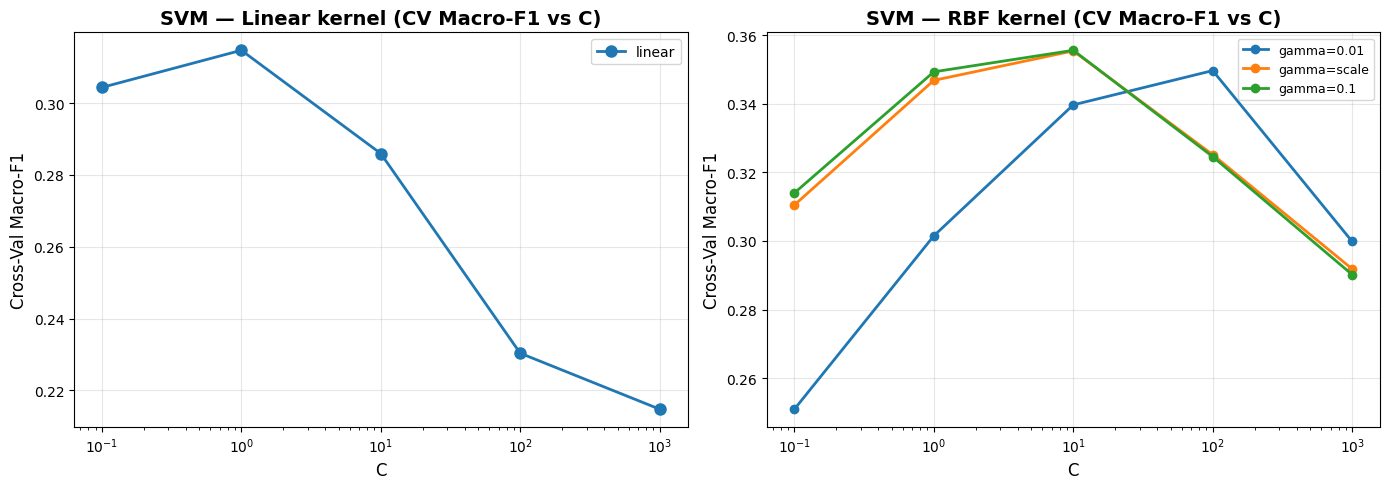

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/svm_model_complexity.png
--- SVM Step 1: Model-complexity (linear vs RBF, CV Macro-F1 vs C) ---
Linear — CV Macro-F1 at C= 1 : 0.31470220492589746
RBF gamma=0.01 — CV Macro-F1: [0.2509, 0.3015, 0.3397, 0.3497, 0.2999]
RBF gamma=scale — CV Macro-F1: [0.3105, 0.3469, 0.3554, 0.3252, 0.2918]
RBF gamma=0.1 — CV Macro-F1: [0.314, 0.3493, 0.3556, 0.3246, 0.2902]
Best config: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1} | best_cv_f1_macro: 0.3556
Results saved to: /home/ubuntu/ml-supervised-project1/wine_quality/SVM_results.txt

SVM Step 2: Learning curves


/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-

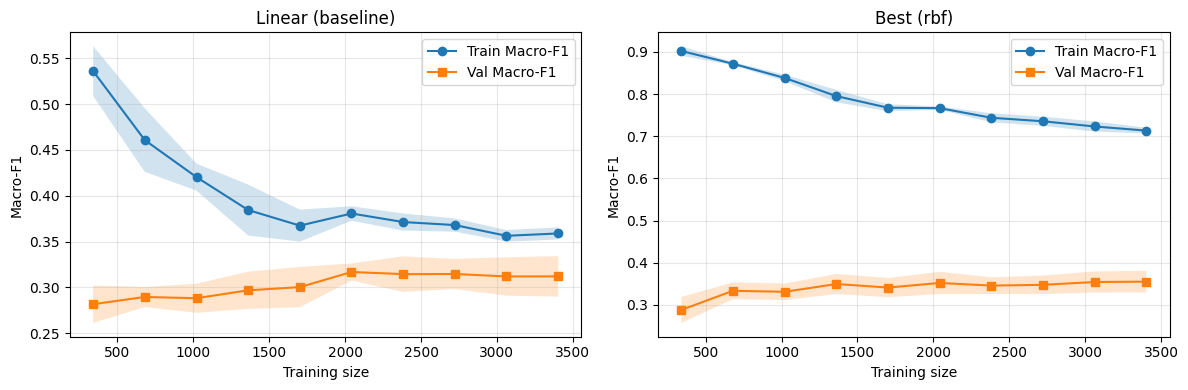

--- SVM Step 2: Learning curves ---
train_sizes: [340, 680, 1021, 1361, 1702, 2042, 2382, 2723, 3063, 3404]
Linear: val_f1_macro_mean: [0.2817, 0.2896, 0.2882, 0.2968, 0.3003, 0.3168, 0.3145, 0.3146, 0.312, 0.312]
Best: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1} val_f1_macro_mean: [0.2881, 0.3334, 0.331, 0.3495, 0.3411, 0.352, 0.3457, 0.3476, 0.3542, 0.3551]
Appended to: /home/ubuntu/ml-supervised-project1/wine_quality/SVM_results.txt

SVM Step 3: Test evaluation


/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


--- SVM Step 3: Test evaluation ---
Best config: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
Test metrics: {'accuracy': 0.5009398496240601, 'f1_macro': 0.3435380297662307, 'f1_weighted': 0.5096204877049157, 'f1_micro': 0.5009398496240601, 'f1_per_class': {'class_1': 0.0, 'class_2': 0.24561403508771928, 'class_3': 0.5355648535564853, 'class_4': 0.5485714285714286, 'class_5': 0.5074626865671642, 'class_6': 0.46923076923076923, 'class_7': 0.4418604651162791, 'class_8': 0.0}, 'accuracy_per_class': {'class_1': 0.0, 'class_2': 0.45161290322580644, 'class_3': 0.540084388185654, 'class_4': 0.5217391304347826, 'class_5': 0.47035573122529645, 'class_6': 0.45864661654135336, 'class_7': 0.5588235294117647, 'class_8': 0.0}, 'precision_per_class': {'class_1': 0.0, 'class_2': 0.1686746987951807, 'class_3': 0.5311203319502075, 'class_4': 0.5783132530120482, 'class_5': 0.5509259259259259, 'class_6': 0.48031496062992124, 'class_7': 0.36538461538461536, 'class_8': 0.0}, 'confusion_matrix': [[0, 1, 2, 1, 0, 

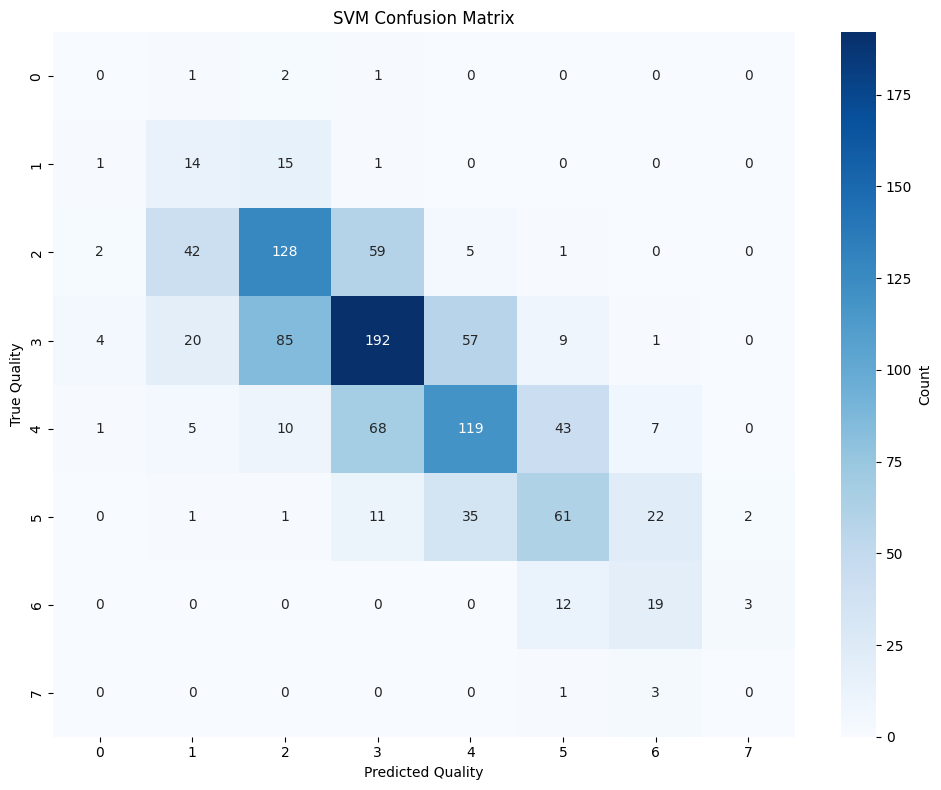


SVM Analysis Complete
Best config: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
Test Accuracy: 0.5009
Test Macro-F1: 0.3435
Results saved to: SVM_results.txt


In [6]:
from models_svm import run_svm_model_complexity, run_svm_learning_curves, run_svm_test_eval

# Step 1: Model complexity (linear vs RBF, C and gamma tuning)
print("="*60)
print("SVM Step 1: Model-complexity analysis")
print("="*60)
svm_results = run_svm_model_complexity(X_train, y_train, X_test, y_test, cv=5)

# Step 2: Learning curves
print("\n" + "="*60)
print("SVM Step 2: Learning curves")
print("="*60)
run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results['best_config'], cv=5)

# Step 3: Test evaluation
print("\n" + "="*60)
print("SVM Step 3: Test evaluation")
print("="*60)
svm_test_results = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results['best_config'])

print("\n" + "="*60)
print("SVM Analysis Complete")
print("="*60)
print(f"Best config: {svm_results['best_config']}")
print(f"Test Accuracy: {svm_test_results['test_metrics']['accuracy']:.4f}")
print(f"Test Macro-F1: {svm_test_results['test_metrics']['f1_macro']:.4f}")
print(f"Results saved to: SVM_results.txt")

### SVM without class weight

Same pipeline (model-complexity, learning curves, test eval) with `class_weight=None`. Results and plots use suffix `_no_weights`.

In [ ]:
svm_results_no_cw = run_svm_model_complexity(X_train, y_train, X_test, y_test, cv=5, class_weight=None)
run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results_no_cw['best_config'], cv=5, class_weight=None)
svm_test_results_no_cw = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results_no_cw['best_config'], class_weight=None)

---
## 8. Neural Networks — sklearn (MLPClassifier)

TODO: Implement sklearn NN experiments.

NN sklearn Step 1: Width search


NN width sweep: 100%|██████████| 25/25 [00:00<00:00, 1201.43it/s]


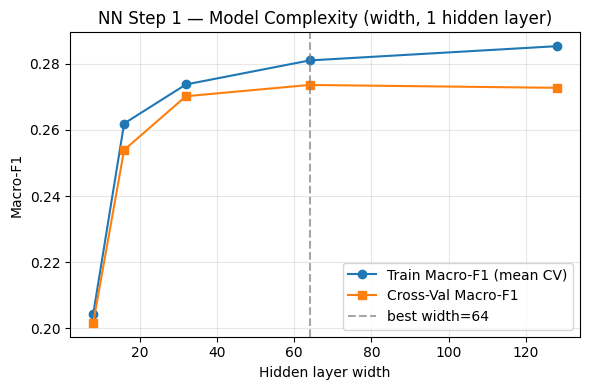

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/nn_width_model_complexity.png
Step 1 best width: 64
Appended to: /home/ubuntu/ml-supervised-project1/wine_quality/NN_sklearn_results.txt

NN sklearn Step 2: Depth vs width


NN step2 depth sweep: 100%|██████████| 15/15 [00:00<00:00, 28649.62it/s]


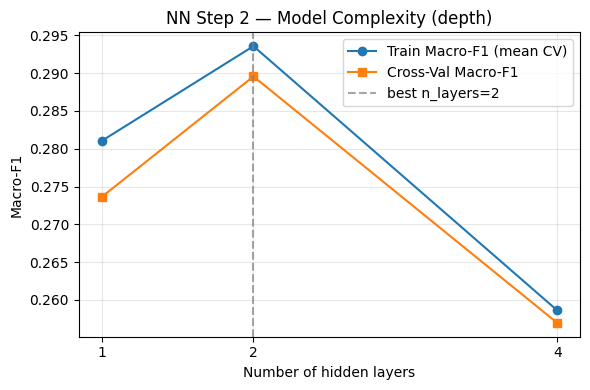

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/nn_depth_model_complexity.png
Step 2 best architecture: [32, 32]
Appended to: /home/ubuntu/ml-supervised-project1/wine_quality/NN_sklearn_results.txt

NN sklearn Step 3: Learning rate sweep


NN step3 LR sweep: 100%|██████████| 20/20 [00:00<00:00, 19987.15it/s]


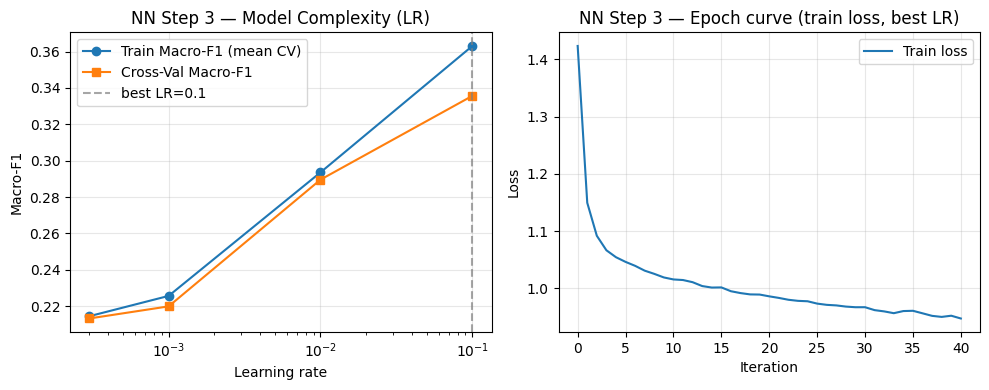

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/nn_lr_curves.png
Step 3 best LR: 0.1
Appended to: /home/ubuntu/ml-supervised-project1/wine_quality/NN_sklearn_results.txt
Best model — architecture: [32, 32] | LR: 0.1

NN sklearn Step 4: Final model evaluation


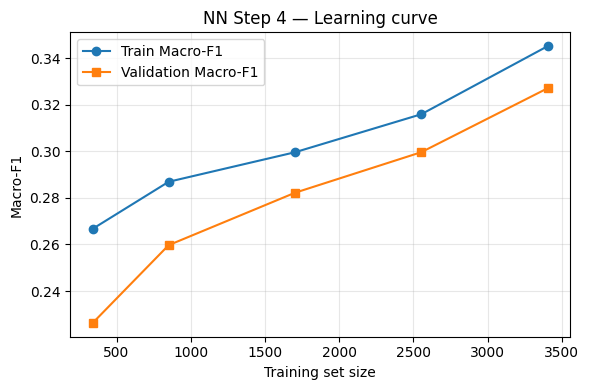

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/nn_learning_curve.png


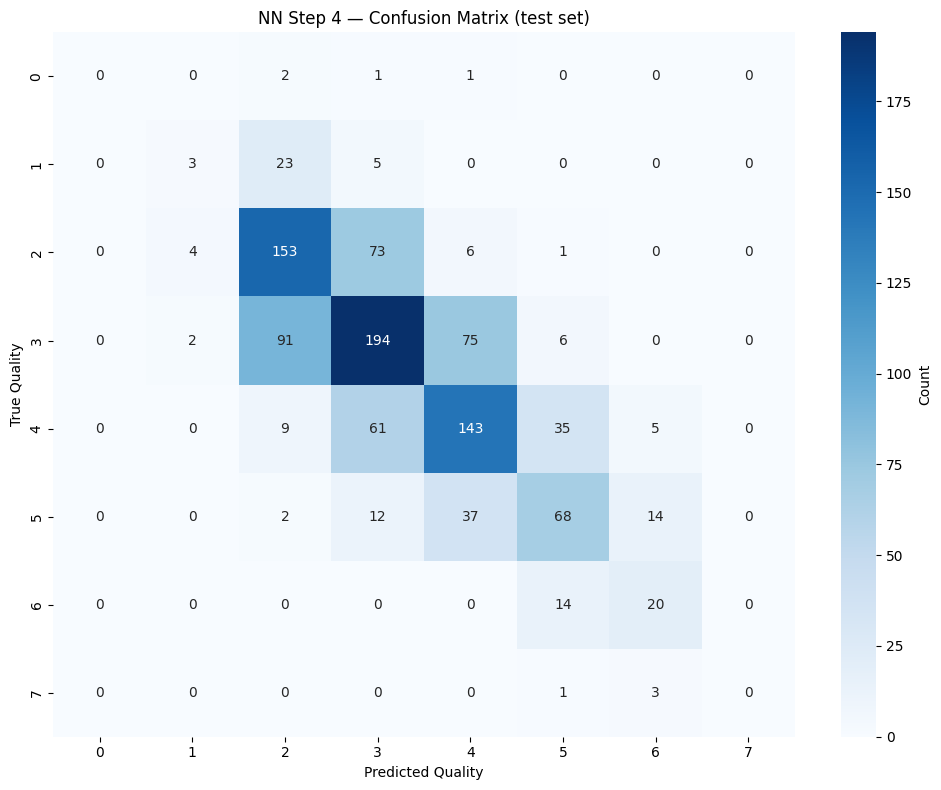

Saved: /home/ubuntu/ml-supervised-project1/wine_quality/outputs/nn_confusion_matrix.png
Step 4 done. Test Macro-F1: 0.3618 | Fit time: 0.46 s

NN sklearn Analysis Complete
Best architecture: [32, 32]
Best learning rate: 0.1
Test Accuracy: 0.5461
Test Macro-F1: 0.3618
Results saved to: NN_sklearn_results.txt


In [3]:
from models_nn_sklearn import run_nn_step1, run_nn_step2, run_nn_step3, run_nn_step4

# Step 1: Width search (1 hidden layer)
print("="*60)
print("NN sklearn Step 1: Width search")
print("="*60)
nn_step1 = run_nn_step1(X_train, y_train, X_test, y_test, cv=5)

# Step 2: Depth vs width
print("\n" + "="*60)
print("NN sklearn Step 2: Depth vs width")
print("="*60)
nn_step2 = run_nn_step2(X_train, y_train, X_test, y_test, nn_step1, cv=5)

# Step 3: Learning rate sweep
print("\n" + "="*60)
print("NN sklearn Step 3: Learning rate sweep")
print("="*60)
nn_step3 = run_nn_step3(X_train, y_train, X_test, y_test, nn_step2, cv=5)

# Step 4: Final model (learning curves, test evaluation)
print("\n" + "="*60)
print("NN sklearn Step 4: Final model evaluation")
print("="*60)
nn_step4 = run_nn_step4(X_train, y_train, X_test, y_test, nn_step3, cv=5)

print("\n" + "="*60)
print("NN sklearn Analysis Complete")
print("="*60)
print(f"Best architecture: {list(nn_step3['best_architecture'])}")
print(f"Best learning rate: {nn_step3['best_lr']}")
print(f"Test Accuracy: {nn_step4['test_metrics']['accuracy']:.4f}")
print(f"Test Macro-F1: {nn_step4['test_metrics']['f1_macro']:.4f}")
print(f"Results saved to: NN_sklearn_results.txt")

---
## 9. Neural Networks — PyTorch

TODO: Implement PyTorch NN experiments.

In [ ]:
# TODO: Implement PyTorch NN experiments
# from models_nn_pytorch import run_nn_model_complexity, run_nn_learning_curves, run_nn_test_eval
# 
# # Step 1: Model complexity
# nn_pytorch_results = run_nn_model_complexity(X_train, y_train, X_test, y_test)
# 
# # Step 2: Learning curves
# run_nn_learning_curves(X_train, y_train, X_test, y_test, best_config=nn_pytorch_results['best_config'])
# 
# # Step 3: Test evaluation
# run_nn_test_eval(X_train, y_train, X_test, y_test, best_config=nn_pytorch_results['best_config'])

---
## 10. Cross-Model Comparison & Conclusions

TODO: Compare all models, revisit hypotheses, discuss findings.

TODO: Write comprehensive analysis comparing all models, evaluating hypotheses, and discussing conclusions.